In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [2]:
names = ['user', 'activity', 'timestamp', 'x-accel', 'y-accel', 'z-accel', "NaN"]

df = pd.read_csv("../../../dataset/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt", header=None, names=names, comment=';')

df_clear = df.drop('NaN', axis=1)

df_clear

,user,activity,timestamp,x-accel,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df_clear.iloc[:, 3:6]
y = df_clear['activity']

X.shape, y.shape

((1098204, 3), (1098204,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [6]:
col = X_train.columns
col

Index(['x-accel', 'y-accel', 'z-accel'], dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

scaled_X_train = pd.DataFrame(data = X_train, columns = col)
scaled_X_test = pd.DataFrame(data = X_test, columns = col)
scaled_X_train['label'] = y_train.values
scaled_X_test['label'] = y_test.values

X_train = scaled_X_train
X_test = scaled_X_test

scaled_X_train.head(10)

,x-accel,y-accel,z-accel,label
0,2.220233,1.048787,-1.086362,Jogging
1,0.310554,0.241872,0.484817,Downstairs
2,-0.091561,0.043110,-0.362306,Downstairs
3,0.557672,-0.446379,0.152492,Jogging
4,-0.186606,0.384268,0.148286,Upstairs
5,-0.202690,-1.315593,1.904557,Sitting
6,0.385128,1.753354,1.267761,Jogging
7,-0.047693,-0.434513,-0.580030,Jogging
8,0.401213,-1.042666,1.050037,Jogging
9,2.473200,0.054976,2.499796,Jogging


In [8]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(y_test, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T) 

Train data label statistics::
[['Downstairs' 67320]
 ['Jogging' 228866]
 ['Sitting' 40229]
 ['Standing' 32391]
 ['Upstairs' 82298]
 ['Walking' 284692]]
Test data label statistics::
[['Downstairs' 33107]
 ['Jogging' 113310]
 ['Sitting' 19710]
 ['Standing' 16004]
 ['Upstairs' 40571]
 ['Walking' 139706]]


In [10]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train, y_train = create_dataset(X_train[col], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[col], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

(735795, 1, 3) (735795, 1)


In [11]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [13]:
verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [14]:
# model = keras.Sequential()
# model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train.shape[1], X_train.shape[2]])))
# model.add(Dropout(rate = 0.5))
# model.add(Dense(units = 128, activation = "relu"))
# model.add(Dense(y_train.shape[1], activation = "softmax"))
# model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [15]:
model = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4608      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 4,806
Trainable params: 4,806
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/100
20695/20695 [==============================] - 53s 2ms/step - loss: 1.2024 - acc: 0.5460 - val_loss: 1.1120 - val_acc: 0.5707
Epoch 2/100
20695/20695 [==============================] - 29s 1ms/step - loss: 1.1520 - acc: 0.5630 - val_loss: 1.0925 - val_acc: 0.5829
Epoch 3/100
20695/20695 [==============================] - 34s 2ms/step - loss: 1.1412 - acc: 0.5669 - val_loss: 1.0799 - val_acc: 0.5878
Epoch 4/100
20695/20695 [==============================] - 39s 2ms/step - loss: 1.1301 - acc: 0.5714 - val_loss: 1.0721 - val_acc: 0.5922
Epoch 5/100
20695/20695 [==============================] - 91s 4ms/step - loss: 1.1232 - acc: 0.5740 - val_loss: 1.0629 - val_acc: 0.5978
Epoch 6/100
20695/20695 [==============================] - 57s 3ms/step - loss: 1.1195 - acc: 0.5754 - val_loss: 1.0599 - val_acc: 0.5966
Epoch 7/100
20695/20695 [==============================] - 40s 2ms/step - loss: 1.1159 - acc: 0.5766 - val_loss: 1.0571 - val_acc: 0.5974
Epoch 8/100
20695/20695 [=========

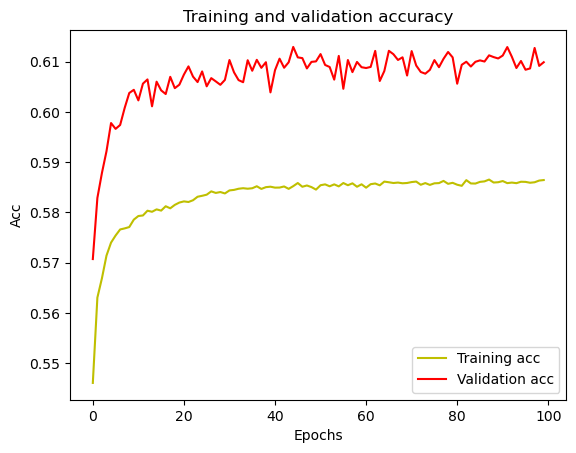

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

acc = history.history['acc']
val_acc = history.history['val_acc']

x = np.arange(0, 100)
plt.plot(x, acc, 'y', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [18]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

11326/11326 [==============================] - 9s 689us/step


In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

11326/11326 [==============================] - 9s 761us/step
Confusion Matrix
[[     0   4583    264    819      0  27440]
 [     0  73653   2169    284      0  37204]
 [     0   1132  17038     90      0   1450]
 [     0      2      0  10366      0   5636]
 [     0   6625    505   1655      0  31786]
 [     1  18556    403   1717      0 119029]]


In [20]:
score = model.evaluate(X_test, y_test)

pd.DataFrame(score)

11326/11326 [==============================] - 9s 819us/step - loss: nan - acc: 0.6073


,0
0,NaN
1,0.60729
